In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import c
import d
import microstructure
import u

In [3]:
plt.rcParams["figure.figsize"] = (20, 8)
data = d.fetch("data/future/daily", "ES.csv")
data["log_close"] = np.log(data["Close"])

period = pd.Timedelta(52, "W")
rolling_window = "365D"
min_periods = 180

# High-Low Volatility Estimator

<AxesSubplot:xlabel='Date'>

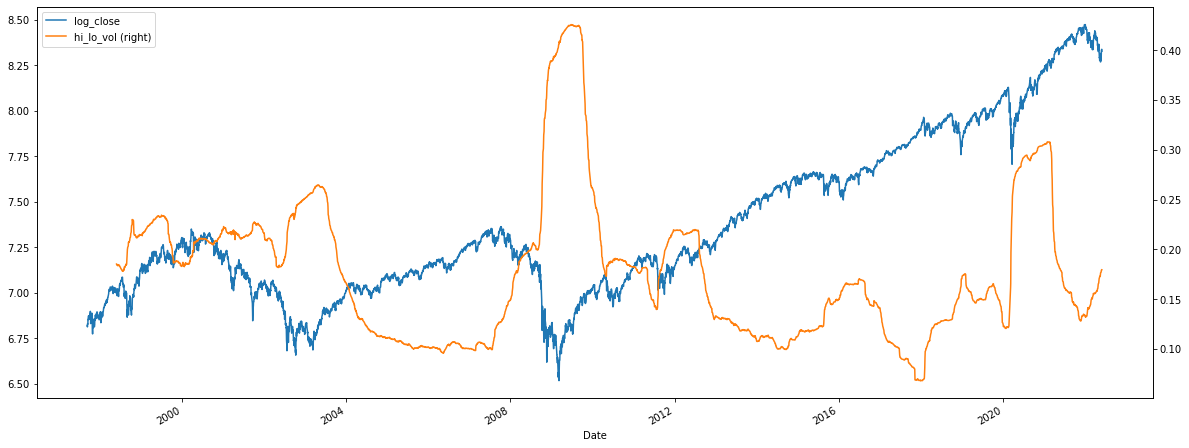

In [4]:
data["hi_lo_vol"] = microstructure.high_low_volatility_estimator(
    data, period=period, rolling_window=rolling_window, min_periods=min_periods
)
data[["log_close", "hi_lo_vol"]].plot(secondary_y="hi_lo_vol")

# Close-Close Volatility Estimator

<AxesSubplot:xlabel='Date'>

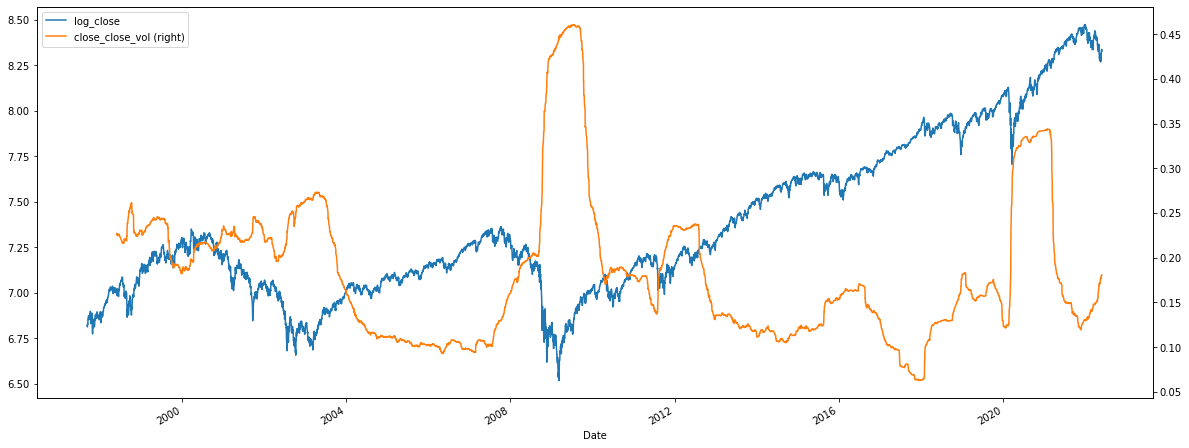

In [5]:
data["close_close_vol"] = microstructure.close_close_volatility_estimator(
    data, period=period, rolling_window=rolling_window, min_periods=min_periods
)
data[["log_close", "close_close_vol"]].plot(secondary_y="close_close_vol")

# Comparison

<AxesSubplot:xlabel='Date'>

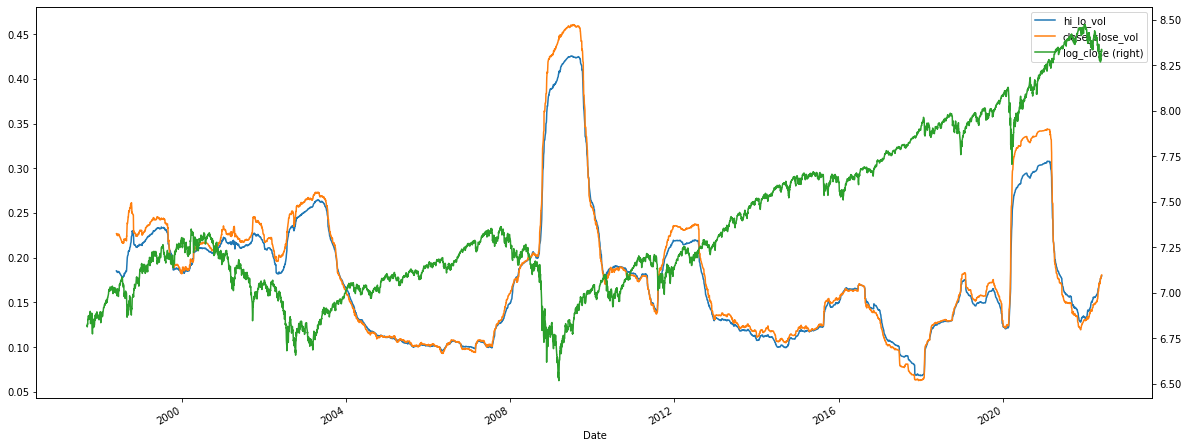

In [6]:
data[["hi_lo_vol", "close_close_vol", "log_close"]].plot(secondary_y="log_close")

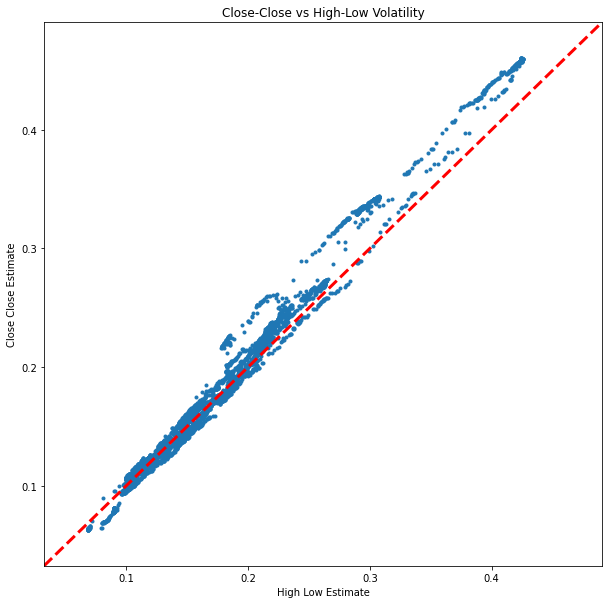

In [16]:
plt.figure(figsize=(10, 10))

plt.scatter(data["hi_lo_vol"], data["close_close_vol"], marker=".")
plt.title("Close-Close vs High-Low Volatility")
plt.xlabel("High Low Estimate")
plt.ylabel("Close Close Estimate")

mini, maxi = (
    data[["hi_lo_vol", "close_close_vol"]].min().min(),
    data[["hi_lo_vol", "close_close_vol"]].max().max(),
)
mini -= 0.03
maxi += 0.03
ax = plt.gca()
ax.set_xlim(xmin=mini, xmax=maxi)
ax.set_ylim(ymin=mini, ymax=maxi)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle="--", color="r", lw=3, scalex=False, scaley=False)